## Data analyser

In [3]:
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Bovw

## Bovw hyperparameter search results

### Train accuracies

In [5]:
# LINEAR
# Split 1
df_1_linear_train = pd.read_csv('output/bovw/split_1/svm_results/train_acc_linear.csv')
# Split 2
df_2_linear_train = pd.read_csv('output/bovw/split_2/svm_results/train_acc_linear.csv')
# Split 3
df_3_linear_train =pd.read_csv('output/bovw/split_3/svm_results/train_acc_linear.csv')

# POLY
# Split 1
df_1_poly_train = pd.read_csv('output/bovw/split_1/svm_results/train_acc_poly.csv')
# Split 2
df_2_poly_train = pd.read_csv('output/bovw/split_2/svm_results/train_acc_poly.csv')
# Split 3
df_3_poly_train =pd.read_csv('output/bovw/split_3/svm_results/train_acc_poly.csv')

# RBF
# Split 1
df_1_rbf_train = pd.read_csv('output/bovw/split_1/svm_results/train_acc_rbf.csv')
# Split 2
df_2_rbf_train = pd.read_csv('output/bovw/split_2/svm_results/train_acc_rbf.csv')
# Split 3
df_3_rbf_train =pd.read_csv('output/bovw/split_3/svm_results/train_acc_rbf.csv')

### Validation accuracies

In [6]:
# LINEAR
# Split 1
df_1_linear_val= pd.read_csv('output/bovw/split_1/svm_results/val_acc_linear.csv')
# Split 2
df_2_linear_val = pd.read_csv('output/bovw/split_2/svm_results/val_acc_linear.csv')
# Split 3
df_3_linear_val =pd.read_csv('output/bovw/split_3/svm_results/val_acc_linear.csv')

# POLY
# Split 1
df_1_poly_val = pd.read_csv('output/bovw/split_1/svm_results/val_acc_poly.csv')
# Split 2
df_2_poly_val = pd.read_csv('output/bovw/split_2/svm_results/val_acc_poly.csv')
# Split 3
df_3_poly_val =pd.read_csv('output/bovw/split_3/svm_results/val_acc_poly.csv')

# RBF
# Split 1
df_1_rbf_val = pd.read_csv('output/bovw/split_1/svm_results/val_acc_rbf.csv')
# Split 2
df_2_rbf_val = pd.read_csv('output/bovw/split_2/svm_results/val_acc_rbf.csv')
# Split 3
df_3_rbf_val =pd.read_csv('output/bovw/split_3/svm_results/val_acc_rbf.csv')

In [13]:
dfs_rbf_train = [df_1_rbf_train, df_2_rbf_train, df_3_rbf_train]
dfs_rbf_val = [df_1_rbf_val, df_2_rbf_val, df_3_rbf_val]
dfs_rbf_train[0]["50"]

0     0.823228
1     0.889838
2     0.913749
3     0.935952
4     0.947908
5     0.953032
6     0.956447
7     0.959863
8     0.963279
9     0.966695
10    0.969257
11    0.970965
12    0.971819
13    0.976089
14    0.977797
15    0.980359
16    0.981213
17    0.983775
18    0.983775
19    0.985482
20    0.986336
21    0.986336
22    0.987190
23    0.988044
24    0.988898
25    0.988898
26    0.988898
27    0.989752
28    0.992314
29    0.993168
30    0.993168
31    0.993168
32    0.994876
33    0.994876
34    0.994876
35    0.996584
36    0.996584
37    0.996584
38    0.996584
39    0.996584
40    0.996584
41    0.997438
42    0.997438
43    0.997438
44    0.998292
45    0.998292
46    0.998292
47    0.998292
48    0.998292
49    0.998292
Name: 50, dtype: float64

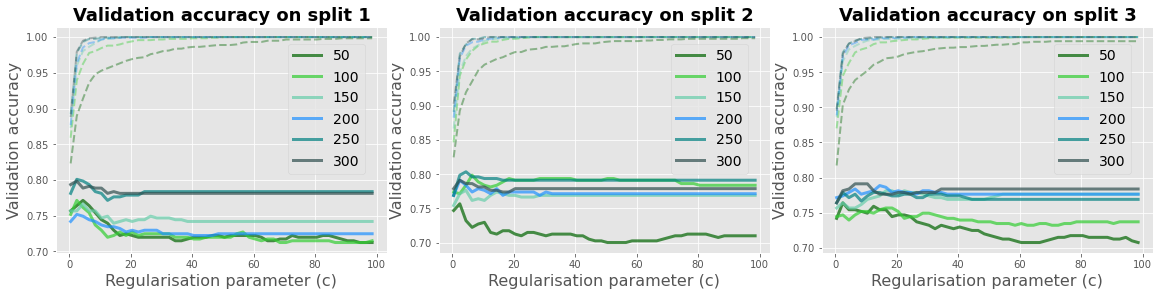

In [35]:
colours = ['darkgreen', 'limegreen', 'mediumaquamarine', 'dodgerblue', 'teal', 'darkslategray']
cs = [50, 100, 150, 200, 250, 300]
x_values = df_1_linear_train.c
fig, axes = plt.subplots(1,3,figsize=(16,4))
for split in range(3):
    axes[split].set_title(f"Validation accuracy on split {split+1}", size=18, fontweight="bold")
    for i in range(6):
        axes[split].plot(x_values, dfs_rbf_val[split][f"{cs[i]}"], "-", alpha=0.7, color=colours[i], label=f"{cs[i]}", linewidth=3)
        axes[split].plot(x_values, dfs_rbf_train[split][f"{cs[i]}"], "--", alpha=0.4, color=colours[i], linewidth=2)
    axes[split].legend(loc=(0.7, 0.35), fontsize=14)
    axes[split].set_xlabel("Regularisation parameter (c)", fontsize=16)
    axes[split].set_ylabel("Validation accuracy", fontsize=16)
    plt.tight_layout(pad=0.3)
plt.savefig('figs/bovw/val_acc_each_split.png')
plt.show()

# ROBUSTNESS

## 5.1 Gaussian pixel noise

In [79]:
# Split 1
df_1_5_1 = pd.read_csv('output/resnet18/robustness/5_1/full_split_1/robustness_results_5_1.csv')
# Split 2
df_2_5_1 = pd.read_csv('output/resnet18/robustness/5_1/full_split_2/robustness_results_5_1.csv')
# Split 3
df_3_5_1 = pd.read_csv('output/resnet18/robustness/5_1/full_split_3/robustness_results_5_1.csv')

In [67]:
means_5_1_acc = np.array([df_1_5_1.best_accs, 
                           df_2_5_1.best_accs, 
                           df_3_5_1.best_accs]).mean(axis=0)
stds_5_1_acc = np.array([df_1_5_1.best_accs, 
                          df_2_5_1.best_accs, 
                          df_3_5_1.best_accs]).std(axis=0)

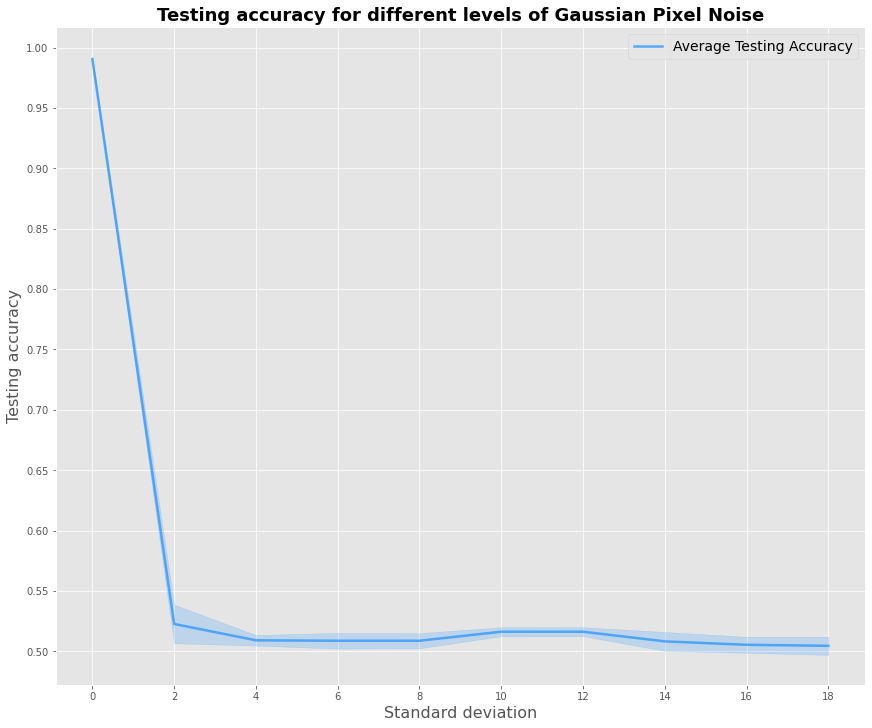

In [122]:
stds = np.arange(0, 19, 2)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Gaussian Pixel Noise", size=18, fontweight="bold")
plt.plot(stds, means_5_1_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    stds,
    means_5_1_acc - stds_5_1_acc,
    means_5_1_acc + stds_5_1_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Standard deviation", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(stds)
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_1.png')
plt.show()

## 5.2 Gaussian blurring

In [81]:
# Split 1
df_1_5_2 = pd.read_csv('output/resnet18/robustness/5_2/full_split_1/robustness_results_5_2.csv')
# Split 2
df_2_5_2 = pd.read_csv('output/resnet18/robustness/5_2/full_split_2/robustness_results_5_2.csv')
# Split 3
df_3_5_2 = pd.read_csv('output/resnet18/robustness/5_2/full_split_3/robustness_results_5_2.csv')

In [82]:
means_5_2_acc = np.array([df_1_5_2.best_accs, 
                           df_2_5_2.best_accs, 
                           df_3_5_2.best_accs]).mean(axis=0)
stds_5_2_acc = np.array([df_1_5_2.best_accs, 
                          df_2_5_2.best_accs, 
                          df_3_5_2.best_accs]).std(axis=0)

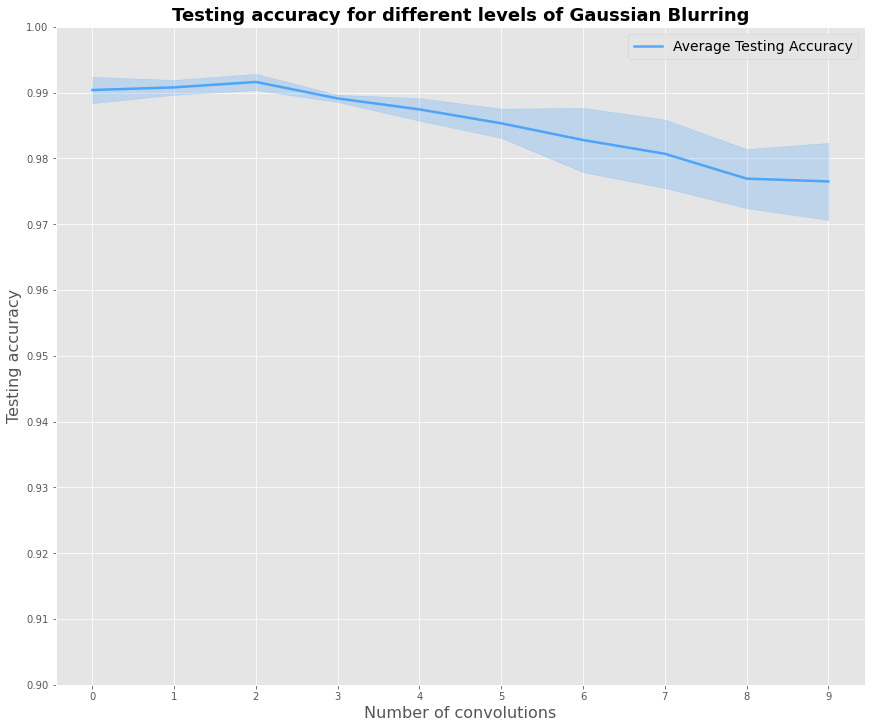

In [121]:
num_convs = np.arange(10)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Gaussian Blurring", size=18, fontweight="bold")
plt.plot(num_convs, means_5_2_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    num_convs,
    means_5_2_acc - stds_5_2_acc,
    means_5_2_acc + stds_5_2_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Number of convolutions", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(num_convs)
plt.yticks(np.arange(0.9, 1.01, 0.01))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_2.png')
plt.show()

## 5.3 Image contrast increase

In [152]:
# Split 1
df_1_5_3 = pd.read_csv('output/resnet18/robustness/5_3/full_split_1/robustness_results_5_3.csv')
# Split 2
df_2_5_3 = pd.read_csv('output/resnet18/robustness/5_3/full_split_2/robustness_results_5_3.csv')
# Split 3
df_3_5_3 = pd.read_csv('output/resnet18/robustness/5_3/full_split_3/robustness_results_5_3.csv')

In [153]:
means_5_3_acc = np.array([df_1_5_3.best_accs, 
                           df_2_5_3.best_accs, 
                           df_3_5_3.best_accs]).mean(axis=0)
stds_5_3_acc = np.array([df_1_5_3.best_accs, 
                          df_2_5_3.best_accs, 
                          df_3_5_3.best_accs]).std(axis=0)

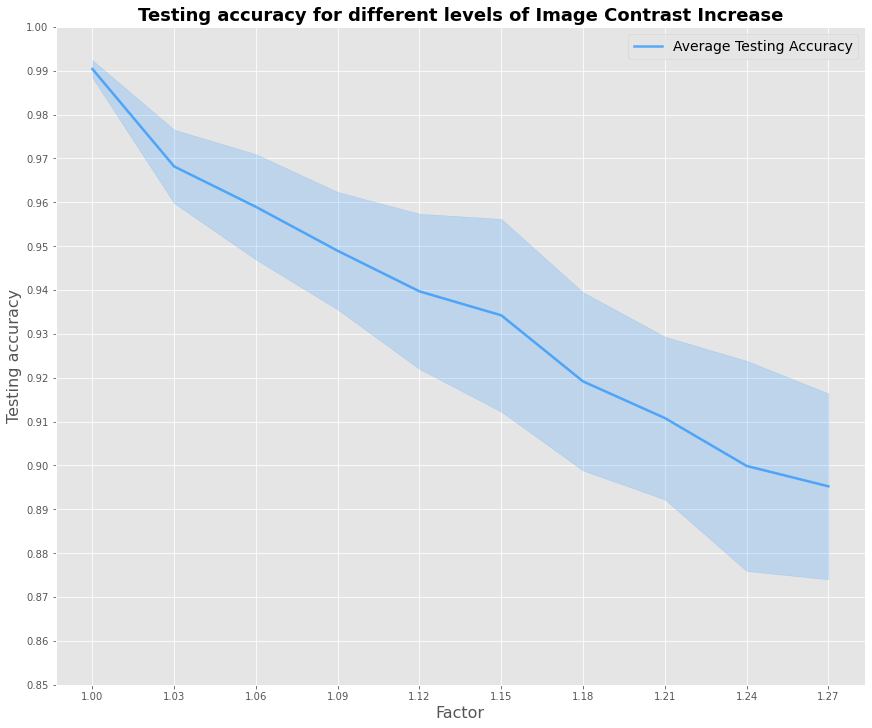

In [159]:
factors = np.linspace(1.0, 1.27, 10)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Image Contrast Increase", size=18, fontweight="bold")
plt.plot(factors, means_5_3_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    factors,
    means_5_3_acc - stds_5_3_acc,
    means_5_3_acc + stds_5_3_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Factor", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(factors)
plt.yticks(np.arange(0.85, 1.001, 0.01))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_3.png')
plt.show()

## 5.4 Image contrast decrease

In [99]:
# Split 1
df_1_5_4 = pd.read_csv('output/resnet18/robustness/5_4/full_split_1/robustness_results_5_4.csv')
# Split 2
df_2_5_4 = pd.read_csv('output/resnet18/robustness/5_4/full_split_2/robustness_results_5_4.csv')
# Split 3
df_3_5_4 = pd.read_csv('output/resnet18/robustness/5_4/full_split_3/robustness_results_5_4.csv')

In [100]:
means_5_4_acc = np.array([df_1_5_4.best_accs, 
                           df_2_5_4.best_accs, 
                           df_3_5_4.best_accs]).mean(axis=0)
stds_5_4_acc = np.array([df_1_5_4.best_accs, 
                          df_2_5_4.best_accs, 
                          df_3_5_4.best_accs]).std(axis=0)

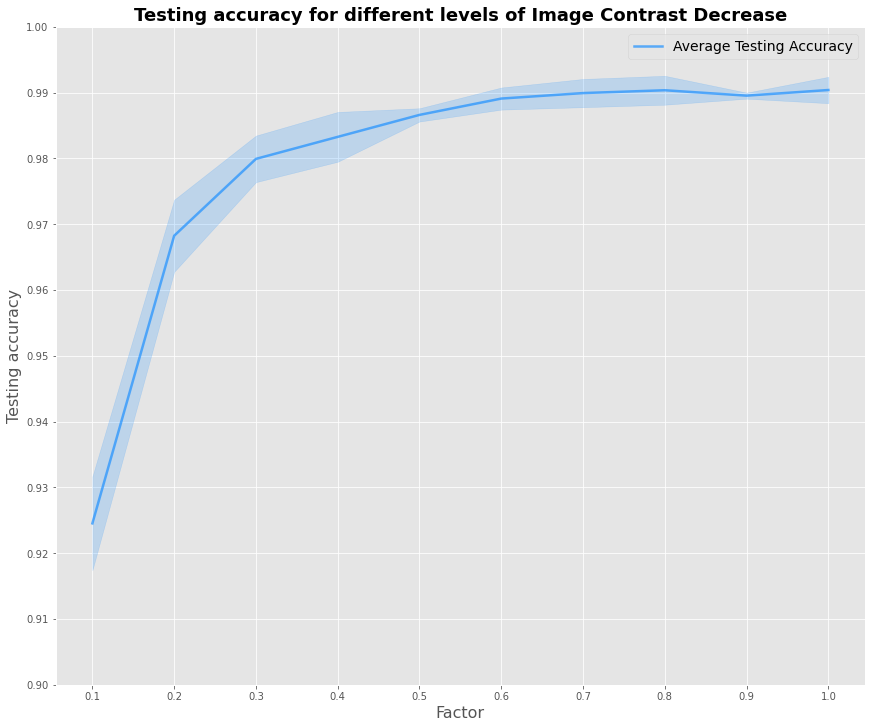

In [119]:
factors = np.arange(1.0, 0.0, -0.1)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Image Contrast Decrease", size=18, fontweight="bold")
plt.plot(factors, means_5_4_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    factors,
    means_5_4_acc - stds_5_4_acc,
    means_5_4_acc + stds_5_4_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Factor", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(factors)
plt.yticks(np.arange(0.9, 1.01, 0.01))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_4.png')
plt.show()

## 5.5 Image brightness increase

In [103]:
# Split 1
df_1_5_5 = pd.read_csv('output/resnet18/robustness/5_5/full_split_1/robustness_results_5_5.csv')
# Split 2
df_2_5_5 = pd.read_csv('output/resnet18/robustness/5_5/full_split_2/robustness_results_5_5.csv')
# Split 3
df_3_5_5 = pd.read_csv('output/resnet18/robustness/5_5/full_split_3/robustness_results_5_5.csv')

In [104]:
means_5_5_acc = np.array([df_1_5_5.best_accs, 
                           df_2_5_5.best_accs, 
                           df_3_5_5.best_accs]).mean(axis=0)
stds_5_5_acc = np.array([df_1_5_5.best_accs, 
                          df_2_5_5.best_accs, 
                          df_3_5_5.best_accs]).std(axis=0)

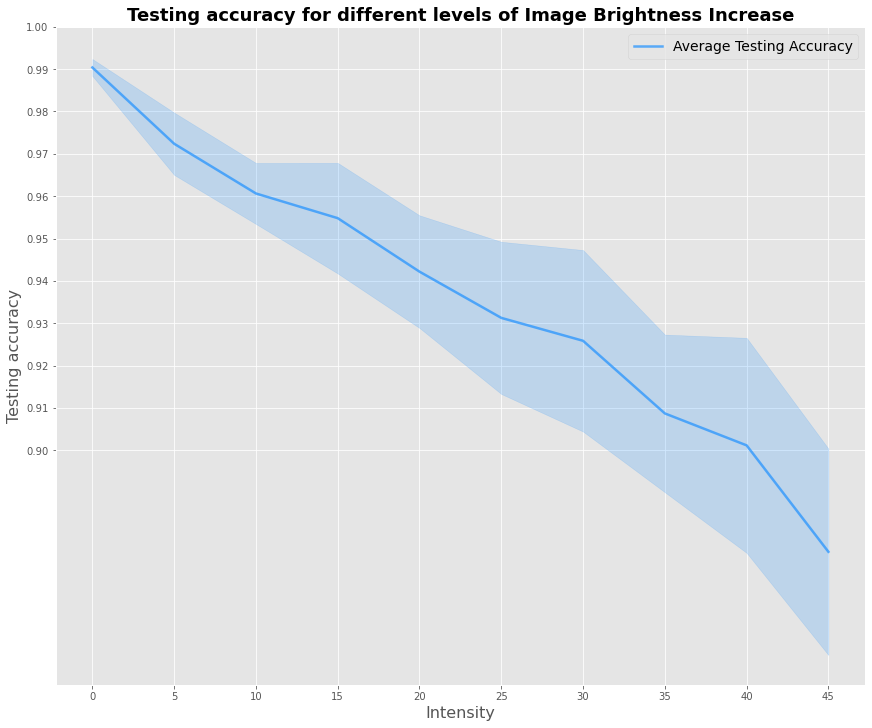

In [118]:
intensity = np.arange(0, 50, 5)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Image Brightness Increase", size=18, fontweight="bold")
plt.plot(intensity, means_5_5_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    intensity,
    means_5_5_acc - stds_5_5_acc,
    means_5_5_acc + stds_5_5_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Intensity", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(intensity)
plt.yticks(np.arange(0.9, 1.01, 0.01))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_5png')
plt.show()

## 5.6 Image brightness decrease

In [106]:
# Split 1
df_1_5_6 = pd.read_csv('output/resnet18/robustness/5_6/full_split_1/robustness_results_5_6.csv')
# Split 2
df_2_5_6 = pd.read_csv('output/resnet18/robustness/5_6/full_split_2/robustness_results_5_6.csv')
# Split 3
df_3_5_6 = pd.read_csv('output/resnet18/robustness/5_6/full_split_3/robustness_results_5_6.csv')a

In [107]:
means_5_6_acc = np.array([df_1_5_6.best_accs, 
                           df_2_5_6.best_accs, 
                           df_3_5_6.best_accs]).mean(axis=0)
stds_5_6_acc = np.array([df_1_5_6.best_accs, 
                          df_2_5_6.best_accs, 
                          df_3_5_6.best_accs]).std(axis=0)

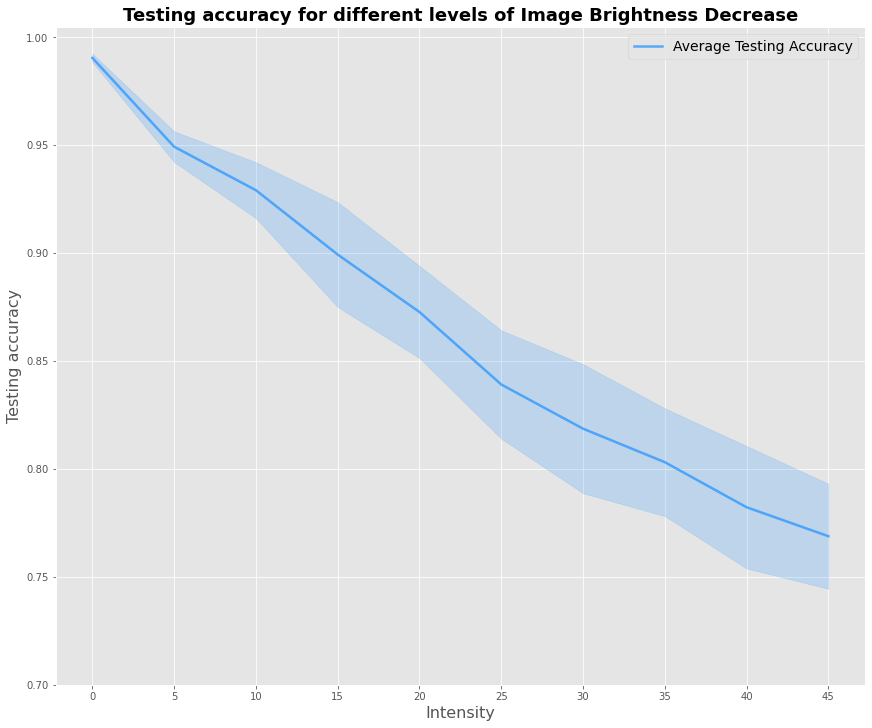

In [117]:
intensity = np.arange(0, 50, 5)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Image Brightness Decrease", size=18, fontweight="bold")
plt.plot(intensity, means_5_6_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    intensity,
    means_5_6_acc - stds_5_6_acc,
    means_5_6_acc + stds_5_6_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Intensity", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(intensity)
plt.yticks(np.arange(0.7, 1.01, 0.05))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_6.png')
plt.show()

## 5.7 HSV Hue noise increase

In [137]:
# Split 1
df_1_5_7 = pd.read_csv('output/resnet18/robustness/5_7/full_split_1/robustness_results_5_7.csv')
# Split 2
df_2_5_7 = pd.read_csv('output/resnet18/robustness/5_7/full_split_2/robustness_results_5_7.csv')
# Split 3
df_3_5_7 = pd.read_csv('output/resnet18/robustness/5_7/full_split_3/robustness_results_5_7.csv')

In [138]:
means_5_7_acc = np.array([df_1_5_7.best_accs, 
                           df_2_5_7.best_accs, 
                           df_3_5_7.best_accs]).mean(axis=0)
stds_5_7_acc = np.array([df_1_5_7.best_accs, 
                          df_2_5_7.best_accs, 
                          df_3_5_7.best_accs]).std(axis=0)

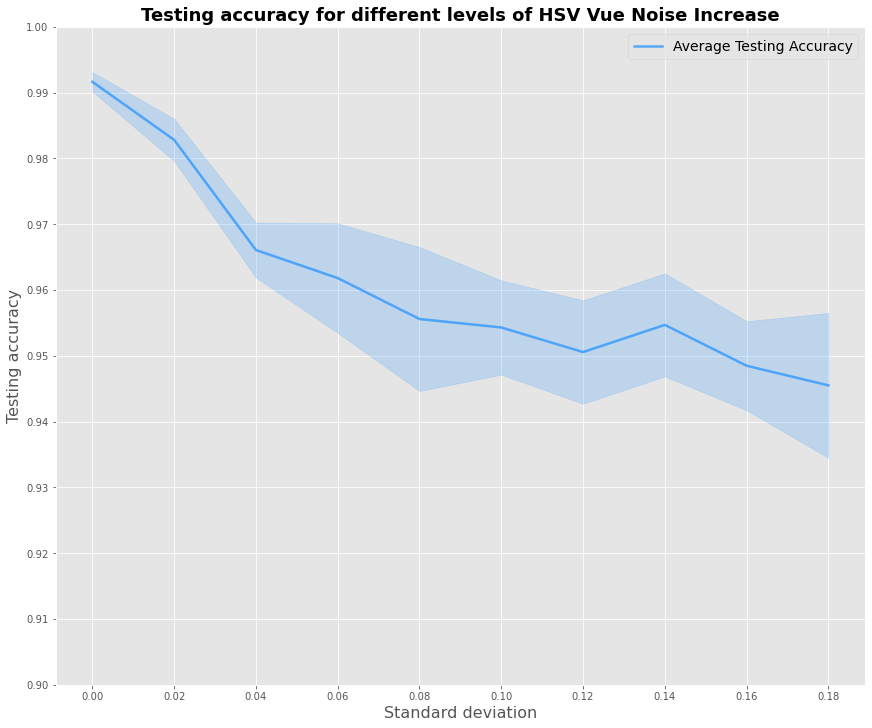

In [140]:
stds = np.arange(0.0, 0.19, .02)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of HSV Vue Noise Increase", size=18, fontweight="bold")
plt.plot(stds, means_5_7_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    stds,
    means_5_7_acc - stds_5_7_acc,
    means_5_7_acc + stds_5_7_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Standard deviation", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(stds)
plt.yticks(np.arange(0.9, 1.01, 0.01))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_7.png')
plt.show()

## 5.8 HSV Saturation Noise Increase

In [141]:
# Split 1
df_1_5_8 = pd.read_csv('output/resnet18/robustness/5_8/full_split_1/robustness_results_5_8.csv')
# Split 2
df_2_5_8 = pd.read_csv('output/resnet18/robustness/5_8/full_split_2/robustness_results_5_8.csv')
# Split 3
df_3_5_8 = pd.read_csv('output/resnet18/robustness/5_8/full_split_3/robustness_results_5_8.csv')

In [142]:
means_5_8_acc = np.array([df_1_5_8.best_accs, 
                           df_2_5_8.best_accs, 
                           df_3_5_8.best_accs]).mean(axis=0)
stds_5_8_acc = np.array([df_1_5_8.best_accs, 
                          df_2_5_8.best_accs, 
                          df_3_5_8.best_accs]).std(axis=0)

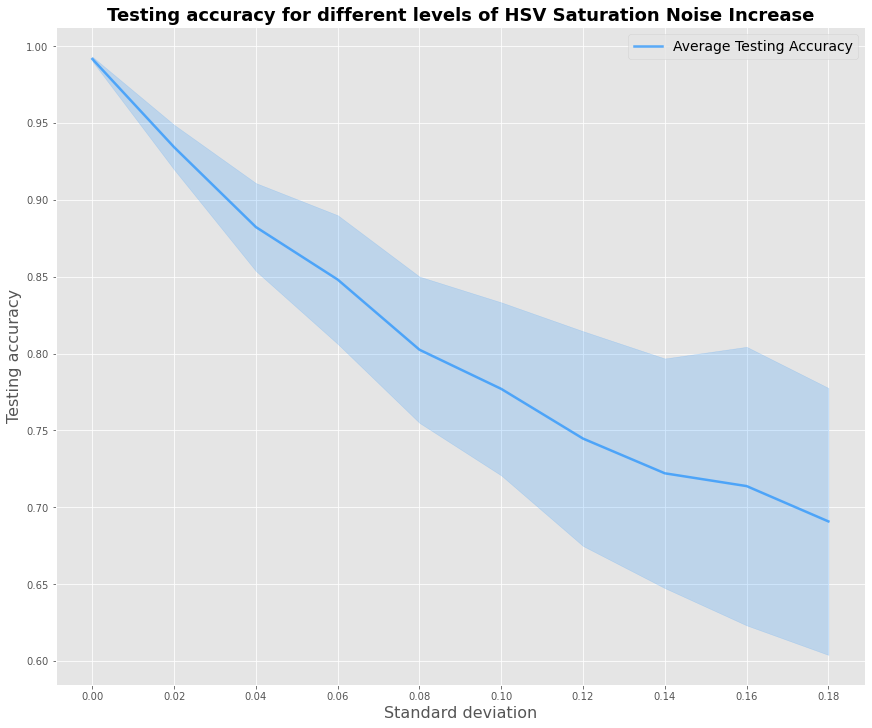

In [144]:
stds = np.arange(0.0, 0.19, .02)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of HSV Saturation Noise Increase", size=18, fontweight="bold")
plt.plot(stds, means_5_8_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    stds,
    means_5_8_acc - stds_5_8_acc,
    means_5_8_acc + stds_5_8_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Standard deviation", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(stds)
#plt.yticks(np.arange(0.9, 1.01, 0.01))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_8.png')
plt.show()

## 5.9 Occlusion of the image increase

In [145]:
# Split 1
df_1_5_9 = pd.read_csv('output/resnet18/robustness/5_9/full_split_1/robustness_results_5_9.csv')
# Split 2
df_2_5_9 = pd.read_csv('output/resnet18/robustness/5_9/full_split_2/robustness_results_5_9.csv')
# Split 3
df_3_5_9 = pd.read_csv('output/resnet18/robustness/5_9/full_split_3/robustness_results_5_9.csv')

In [146]:
means_5_9_acc = np.array([df_1_5_9.best_accs, 
                           df_2_5_9.best_accs, 
                           df_3_5_9.best_accs]).mean(axis=0)
stds_5_9_acc = np.array([df_1_5_9.best_accs, 
                          df_2_5_9.best_accs, 
                          df_3_5_9.best_accs]).std(axis=0)

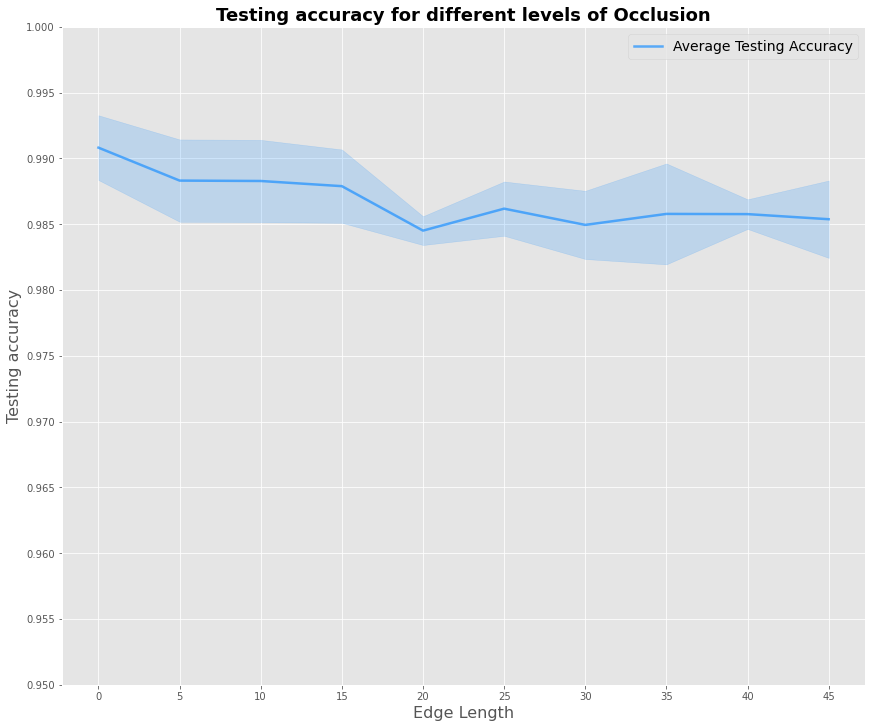

In [151]:
edges = np.arange(0, 50, 5)
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Testing accuracy for different levels of Occlusion", size=18, fontweight="bold")
plt.plot(edges, means_5_9_acc, "-", alpha=0.7, color="dodgerblue", label="Average Testing Accuracy", linewidth=2.5)
plt.fill_between(
    edges,
    means_5_9_acc - stds_5_9_acc,
    means_5_9_acc + stds_5_9_acc,
    alpha=0.2,
    antialiased=True,
    color="dodgerblue"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Edge Length", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.xticks(edges)
plt.yticks(np.arange(0.95, 1.001, 0.005))
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_5_9.png')
plt.show()